In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from matplotlib import style
import datetime
import seaborn
import pandas as pd

In [2]:
style.use('ggplot')

In [3]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [4]:
os.chdir('C:\\Users\\Rohit\\Stock Predictor 1\\Stocks\\')

In [5]:
am= pd.read_csv('amzn.us.txt', header=0, sep='\s*,\s*', engine='python')

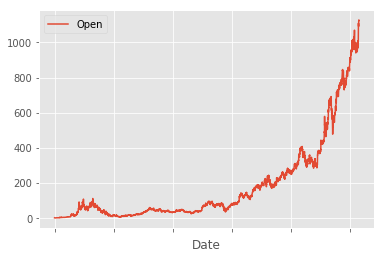

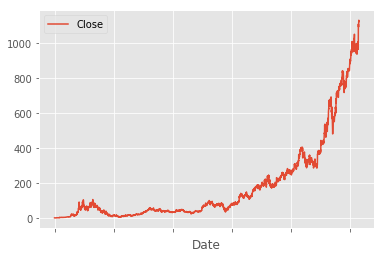

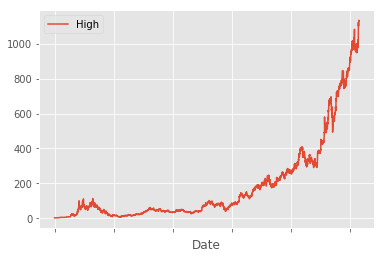

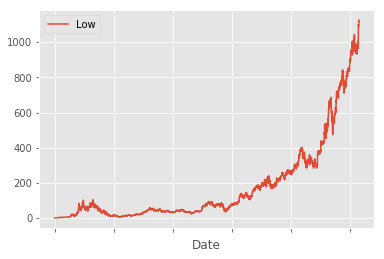

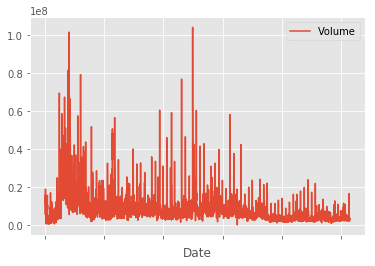

In [6]:
am.plot.line(x = 'Date', 
             y = 'Open')
plt.show()

am.plot.line(x = 'Date', 
             y = 'Close')
plt.show()

am.plot.line(x = 'Date', 
             y = 'High')
plt.show()

am.plot.line(x = 'Date', 
             y = 'Low')
plt.show()

am.plot.line(x = 'Date', 
             y = 'Volume')
plt.show()

fit = SimpleExpSmoothing(am.astype(float)).fit()
fcast = fit.forecast(12).rename(r'$\alpha=%s$'%fit.model.params['smoothing_level'])
# plot
fcast.plot(marker='o', color='green', legend=True)
fit.fittedvalues.plot(marker='o', color='green')

plt.show()

In [7]:
am.dtypes

Date        object
Open       float64
High       float64
Low        float64
Close      float64
Volume       int64
OpenInt      int64
dtype: object

In [8]:
am['Date'] = pd.to_datetime(am.Date, format = '%Y%m%d',errors='ignore')
data = am.drop(['Date'], axis=1)
data.index = am.Date

In [14]:
clf= LinearRegression()

In [9]:
# plt.label(x,y,)

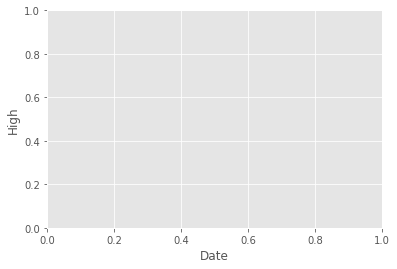

KeyError: "labels [('X', 'Y')] not contained in axis"

In [10]:
plt.xlabel('Date')
plt.ylabel('High')
plt.show()
#missing value treatment
cols = am.columns
for j in cols:
    for i in range(0,len(am)):
        if am[j][i] == -200:
            am[j][i] = am[j][i-1]

#checking stationarity
from statsmodels.tsa.vector_ar.vecm import coint_johansen
#since the test works for only 12 variables, I have randomly dropped
#in the next iteration, I would drop another and check the eigenvalues
johan_test_temp = am.drop([ ['X','Y']], axis=0)
coint_johansen(johan_test_temp,-1,1).eig

In [25]:
train_date, train_high= model_selection.train_test_split(am)

In [26]:
#creating the train and validation set
train = am[int(len(am))]
valid = am[int(len(am))]

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

KeyError: 5153

In [27]:
#converting predictions to dataframe
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,13):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], valid[i])))


NameError: name 'prediction' is not defined

In [28]:
#make final predictions
model = VAR(endog=data)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=1)
print(yhat)

NameError: name 'VAR' is not defined

In [23]:
clf.fit(train_date,train_high)

train_date= train_date.reshape()
train_high=train_high.reshape()

clf.coef_
#clf.intercept_

ValueError: could not convert string to float: '2000-09-18'